<a href="https://colab.research.google.com/github/Buse-cetin/Machine-Learning/blob/main/Ses_Dosyalar%C4%B1n%C4%B1_Metne_D%C3%B6n%C3%BC%C5%9Ft%C3%BCrme_Whisper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U openai-whisper

In [2]:
!apt-get install ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [89]:
import whisper

model = whisper.load_model("small") #base kısmına model adı yazılır. Tiny modeli en düşük sonuç veren;large modeli en iyi sonucu veren modeldir.
result = model.transcribe("Compspkr1.mp3")
print(result["text"])

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 A friend and I went to a concert. After the concert, we decided that we wanted to go to a restaurant. My car...


In [108]:
import whisper

model = whisper.load_model("base")

# load audio and pad/trim it to fit 30 seconds
audio = whisper.load_audio("Compspkr1.mp3")
audio = whisper.pad_or_trim(audio)

# make log-Mel spectrogram and move to the same device as the model
mel = whisper.log_mel_spectrogram(audio).to(model.device)

# detect the spoken language
_, probs = model.detect_language(mel)
print(f"Detected language: {max(probs, key=probs.get)}")

# decode the audio
options = whisper.DecodingOptions()
result = whisper.decode(model, mel, options)

# print the recognized text
print(result.text)

100%|███████████████████████████████████████| 139M/139M [00:01<00:00, 80.5MiB/s]


Detected language: en
A friend and I went to a concert, after the concert, we decided that we wanted to go to a restaurant. My car.


In [111]:
print(options)

DecodingOptions(task='transcribe', language=None, temperature=0.0, sample_len=None, best_of=None, beam_size=None, patience=None, length_penalty=None, prompt=None, prefix=None, suppress_tokens='-1', suppress_blank=True, without_timestamps=False, max_initial_timestamp=1.0, fp16=True)


In [94]:
print(result) #ses ile ilgili bütün parametrelerin çıktsını verir
print(result["language"])#sesin dilini bize verir
# "temperature" terimi, modelin ne kadar rastgele ve çeşitli sonuçlar üreteceğini kontrol etmek için kullanılır.
#"compression_ratio" terimi, orijinal verinin sıkıştırılmış versiyonunun boyutunun, orijinal verinin boyutuna oranını ifade eder.
#"avg_logprob" değeri, bir dil modelinin ürettiği metnin kalitesini ve doğruluğunu değerlendirmek için kullanılabilir
# "no_speech_prob" terimi, sessizlik olasılığını ifade eder. Bu terim, bir metin üretim modelinin, her adımda bir kelime üretme kararı alırken, sessizlik (boşluk) üretme olasılığını belirtir.
#"tokens" terimi, genellikle dil modelinin ürettiği metnin uzunluğunu veya karmaşıklığını ifade etmek için kullanılır.
#"seek" terimi, modelin metin üretme sürecinde belirli bir hedefe yönelik ilerleme veya hedefe ulaşma sürecini ifade eder

{'text': ' A friend and I went to a concert. After the concert, we decided that we wanted to go to a restaurant. My car...', 'segments': [{'id': 0, 'seek': 0, 'start': 0.0, 'end': 2.0, 'text': ' A friend and I went to a concert.', 'tokens': [50364, 316, 1277, 293, 286, 1437, 281, 257, 8543, 13, 50464], 'temperature': 0.0, 'avg_logprob': -0.3132184533511891, 'compression_ratio': 1.2197802197802199, 'no_speech_prob': 0.15264540910720825}, {'id': 1, 'seek': 0, 'start': 2.0, 'end': 6.0, 'text': ' After the concert, we decided that we wanted to go to a restaurant.', 'tokens': [50464, 2381, 264, 8543, 11, 321, 3047, 300, 321, 1415, 281, 352, 281, 257, 6383, 13, 50664], 'temperature': 0.0, 'avg_logprob': -0.3132184533511891, 'compression_ratio': 1.2197802197802199, 'no_speech_prob': 0.15264540910720825}, {'id': 2, 'seek': 0, 'start': 6.0, 'end': 8.0, 'text': ' My car...', 'tokens': [50664, 1222, 1032, 485, 50764], 'temperature': 0.0, 'avg_logprob': -0.3132184533511891, 'compression_ratio': 1.

In [16]:
import whisper

model = whisper.load_model("small") #base kısmına model adı yazılır. Tiny modeli en düşük sonuç veren;large modeli en iyi sonucu veren modeldir.
result = model.transcribe("Echo.mp3")
print(result["text"])

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


 My car was almost out of gas, so I told him to go to the restaurant and wait for me.


In [17]:
print(result)

{'text': ' My car was almost out of gas, so I told him to go to the restaurant and wait for me.', 'segments': [{'id': 0, 'seek': 0, 'start': 0.0, 'end': 7.0, 'text': ' My car was almost out of gas, so I told him to go to the restaurant and wait for me.', 'tokens': [50389, 1222, 1032, 390, 1920, 484, 295, 4211, 11, 370, 286, 1907, 796, 281, 352, 281, 264, 6383, 293, 1699, 337, 385, 13, 50714], 'temperature': 0.0, 'avg_logprob': -0.07168851375579834, 'compression_ratio': 1.0632911392405062, 'no_speech_prob': 0.10348626971244812}], 'language': 'en'}


In [18]:
model = whisper.load_model("small") #base kısmına model adı yazılır. Tiny modeli en düşük sonuç veren;large modeli en iyi sonucu veren modeldir.
result = model.transcribe("chop.mp3")
print(result)

/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


{'text': ' and we will die. It was very, it was very, it was very um', 'segments': [{'id': 0, 'seek': 0, 'start': 0.0, 'end': 3.0, 'text': ' and we will die.', 'tokens': [50364, 293, 321, 486, 978, 13, 50514], 'temperature': 0.0, 'avg_logprob': -0.6787176926930746, 'compression_ratio': 1.2954545454545454, 'no_speech_prob': 0.6434957385063171}, {'id': 1, 'seek': 0, 'start': 3.0, 'end': 6.0, 'text': ' It was very, it was very, it was very', 'tokens': [50514, 467, 390, 588, 11, 309, 390, 588, 11, 309, 390, 588, 50664], 'temperature': 0.0, 'avg_logprob': -0.6787176926930746, 'compression_ratio': 1.2954545454545454, 'no_speech_prob': 0.6434957385063171}, {'id': 2, 'seek': 0, 'start': 6.0, 'end': 7.0, 'text': ' um', 'tokens': [50664, 1105, 50714], 'temperature': 0.0, 'avg_logprob': -0.6787176926930746, 'compression_ratio': 1.2954545454545454, 'no_speech_prob': 0.6434957385063171}], 'language': 'en'}


ses işleme(Echo)

170.45454545454547
[  5  38  74 110 144 176 209 244 275 305 335 365 399 432 463 494]
Eko Değeri: 199079


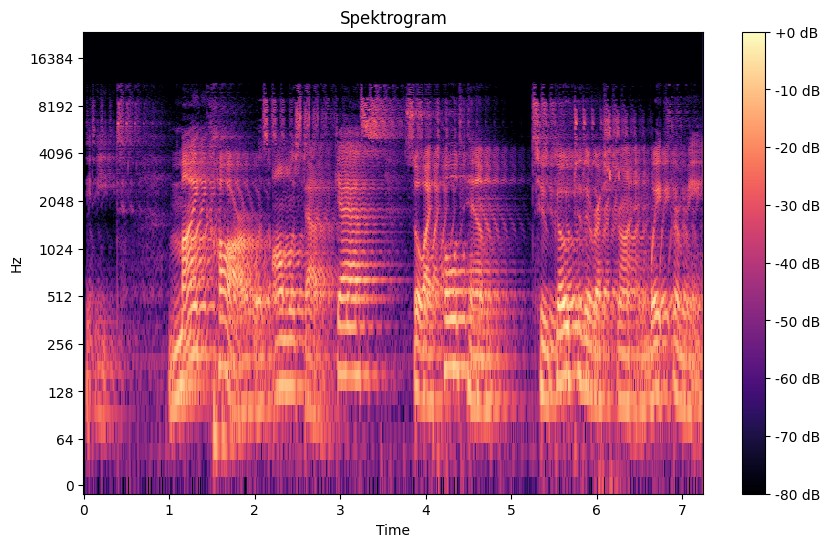

In [42]:
import librosa
import numpy as np

# Ses dosyasını yükle
audio_path = "Echo.mp3"
audio, sr = librosa.load(audio_path, sr=None)

# Ses özelliklerini çıkar
tempo, beat_frames = librosa.beat.beat_track(y=audio, sr=sr)
print(tempo) #vurma
print(beat_frames) #darbe zamanı

# Eşik değeri
threshold = 0.1

# Spektrogramda eşik değerinden büyük olan piksel sayısını hesapla
echo_pixels = np.sum(spectrogram > threshold)

# Eko değerini yazdır
print("Eko Değeri:", echo_pixels)

# Spektrogram oluştur
spectrogram = np.abs(librosa.stft(audio))
import matplotlib.pyplot as plt

# Spektrogramu görselleştir
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram')
plt.show()





Yankı Süresi: 2.0833333333333333e-05 saniye


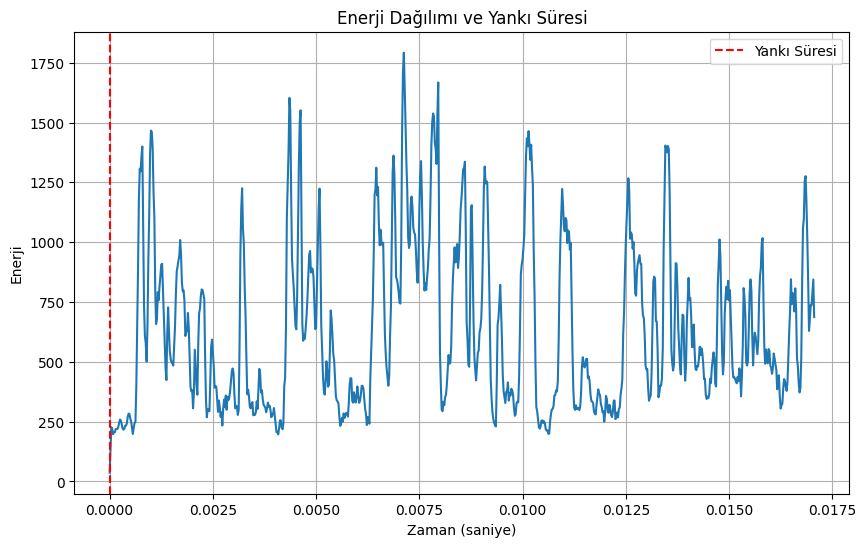

In [64]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Ses dosyasını yükle
audio_path = "Noise.mp3"
audio, sr = librosa.load(audio_path, sr=None)

# Spektrogram oluştur
spectrogram = np.abs(librosa.stft(audio))

# Yankı süresini analiz etmek için sesin enerji dağılımını hesapla
energy = np.sum(spectrogram, axis=0)

# Enerji eşik değeri belirleme
energy_threshold = np.max(energy) * 0.05

# Enerji eşik değerini aşan ilk zaman noktasını bulma
echo_start_index = np.argmax(energy > energy_threshold)

# Yankı süresini belirleme (örneğin, saniye cinsinden)
echo_duration_seconds = echo_start_index / sr

print("Yankı Süresi:", echo_duration_seconds, "saniye")

# Enerji dağılımını ve yankı süresini görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(energy)) / sr, energy)
plt.axvline(x=echo_duration_seconds, color='r', linestyle='--', label='Yankı Süresi')
plt.xlabel('Zaman (saniye)')
plt.ylabel('Enerji')
plt.title('Enerji Dağılımı ve Yankı Süresi')
plt.legend()
plt.grid()
plt.show()


Eko Bölgeleri: [(0, 23), (0, 31), (83, 122), (158, 167), (197, 211), (229, 238), (254, 265), (268, 279), (0, 33), (34, 45), (83, 127), (199, 211), (216, 227), (230, 240), (259, 279), (0, 38), (42, 51), (72, 85), (86, 133), (155, 172), (199, 228), (237, 250), (0, 38), (73, 88), (89, 181), (191, 257), (0, 41), (85, 137), (145, 172), (173, 182), (191, 233), (248, 257), (0, 49), (84, 99), (105, 124), (156, 168), (0, 43), (44, 59), (78, 88), (91, 116), (122, 140), (155, 179), (183, 192), (194, 236), (237, 264), (266, 316), (317, 337), (338, 355), (359, 368), (0, 28), (38, 48), (78, 96), (97, 115), (123, 140), (158, 171), (195, 212), (221, 262), (275, 289), (290, 342), (343, 368), (369, 382), (0, 36), (108, 122), (150, 169), (200, 214), (220, 263), (264, 273), (274, 292), (298, 317), (318, 329), (343, 359), (370, 380), (0, 27), (32, 47), (84, 100), (109, 123), (156, 167), (199, 213), (221, 232), (235, 265), (280, 294), (0, 27), (28, 39), (84, 108), (109, 126), (0, 29), (92, 126), (215, 227),

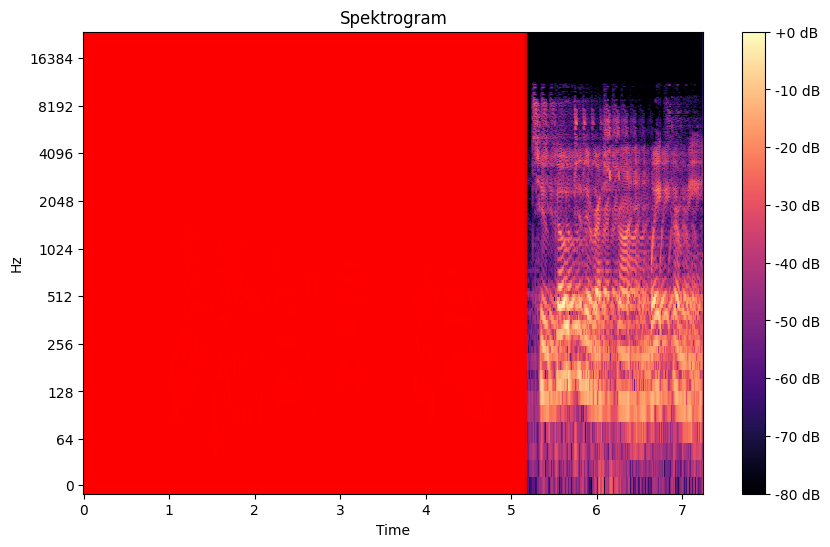

In [68]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def detect_echo(audio_path, threshold=0.1, min_duration=0.1):

    # Ses dosyasını yükle
    audio, sr = librosa.load(audio_path, sr=None)

    # Spektrogram oluştur
    spectrogram = np.abs(librosa.stft(audio))

    # Spektrogramun şekli ve uzunluğu
    num_frames, num_bins = spectrogram.shape

    # Eko süresini depolamak için bir liste oluştur
    echo_regions = []

    # Minimum eko süresini saniye cinsinden hesapla
    min_echo_frames = int(min_duration * sr / 512)  # 512 = n_fft

    # Spektrogram üzerinde tarama yap
    for bin_index in range(num_bins):
        # Enerji eşiğini aşan bölge başlangıcı ve bitişi
        echo_start = None
        for frame_index in range(num_frames):
            if spectrogram[frame_index, bin_index] > threshold:
                if echo_start is None:
                    echo_start = frame_index
            elif echo_start is not None:
                echo_duration = frame_index - echo_start
                if echo_duration >= min_echo_frames:
                    echo_regions.append((echo_start, frame_index))
                echo_start = None

    return echo_regions

def plot_echo_regions(audio_path, echo_regions, threshold=0.1):
    # Ses dosyasını yükle
    audio, sr = librosa.load(audio_path, sr=None)

    # Spektrogram oluştur
    spectrogram = np.abs(librosa.stft(audio))

    # Spektrogramu görselleştirme
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spektrogram')

    # Eko bölgelerini gösterme
    for echo_start, echo_end in echo_regions:
        plt.axvspan(echo_start * 512 / sr, echo_end * 512 / sr, color='red', alpha=0.3)

    plt.show()

# Ses dosyası yolu
audio_path = "Echo.mp3"

# Eko tespiti yap
echo_regions = detect_echo(audio_path, threshold=0.1, min_duration=0.1)
print("Eko Bölgeleri:", echo_regions)

# Eko bölgelerini görselleştir
plot_echo_regions(audio_path, echo_regions)


In [69]:
def calculate_echo_energy(audio_path, echo_regions):
    # Ses dosyasını yükle
    audio, sr = librosa.load(audio_path, sr=None)

    # Eko enerji seviyelerini depolamak için bir liste oluştur
    echo_energies = []

    # Her bir eko bölgesindeki enerji seviyelerini hesapla
    for start_frame, end_frame in echo_regions:
        echo_audio = audio[start_frame:end_frame]
        echo_energy = np.sum(np.square(echo_audio)) / len(echo_audio)
        echo_energies.append(echo_energy)

    # Genel eko enerjisini hesapla (ortalama)
    mean_echo_energy = np.mean(echo_energies)

    return mean_echo_energy

# Ses dosyası yolu
audio_path = "Echo.mp3"

# Eko bölgelerini tespit et
echo_regions = detect_echo(audio_path, threshold=0.1, min_duration=0.1)

# Genel eko enerjisini hesapla
echo_energy = calculate_echo_energy(audio_path, echo_regions)
print("Genel Eko Enerjisi:", echo_energy)


Genel Eko Enerjisi: 0.0


Rekabetçi konuşmayı tespit edebilir


Eko Miktarı (Piksel Sayısı): 202823


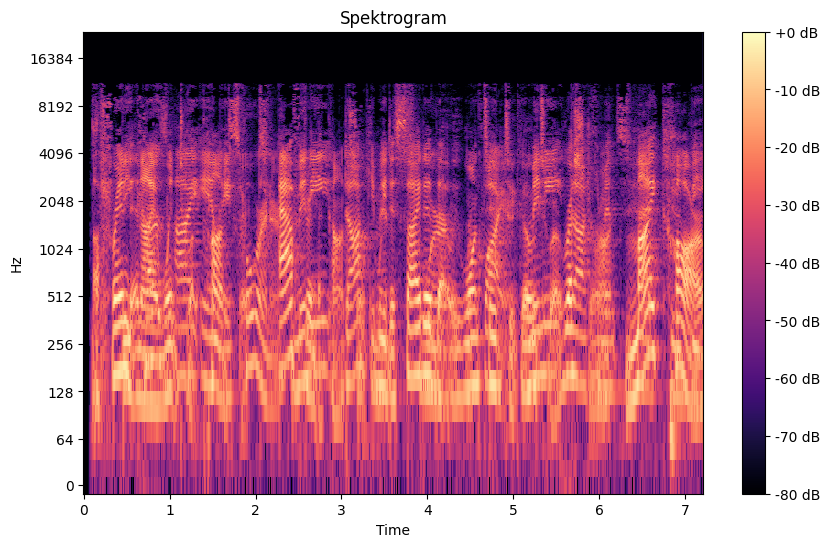

In [51]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Ses dosyasını yükle
audio_path = "Compspkr1.mp3"
audio, sr = librosa.load(audio_path, sr=None)

# Spektrogram oluştur
spectrogram = np.abs(librosa.stft(audio))

# Eşik değeri belirleme (örneğin, 0.1)
threshold = 0.1

# Eko desenlerini tanımlama ve eko miktarını hesaplama
echo_pixels = np.sum(spectrogram > threshold)

# Eko miktarını yazdırma
print("Eko Miktarı (Piksel Sayısı):", echo_pixels)

# Spektrogramu görselleştirme
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spektrogram')
plt.show()


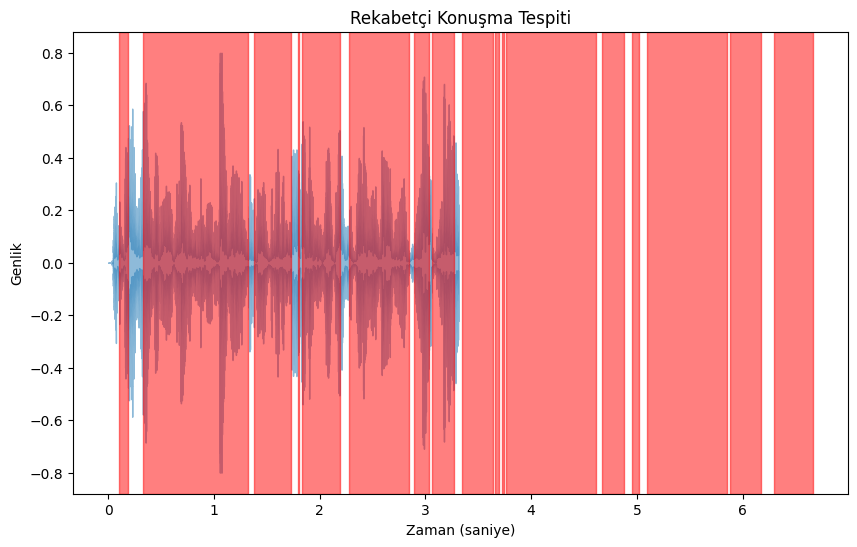

In [95]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def detect_competitive_speech(audio_path, threshold=0.1):
    # Ses dosyasını yükle
    audio, sr = librosa.load(audio_path, sr=None)

    # Spektrogram oluştur
    spectrogram = np.abs(librosa.stft(audio))

    # Enerji eşik değerini belirleme
    energy_threshold = np.max(spectrogram) * threshold

    # Enerji eşik değerini aşan zaman bölgelerini bulma
    competitive_speech_segments = []
    segment_start = None
    for i, frame in enumerate(spectrogram.T):
        if np.max(frame) > energy_threshold:
            if segment_start is None:
                segment_start = i
        elif segment_start is not None:
            competitive_speech_segments.append((segment_start, i))
            segment_start = None

    # Rekabetçi konuşma segmentlerini zaman çizelgesi olarak döndürme
    return [(start * len(audio) / len(spectrogram.T) / sr, end * len(audio) / len(spectrogram.T) / sr) for start, end in competitive_speech_segments]

# Ses dosyası yolu
audio_path = "Compspkr1.mp3"

# Rekabetçi konuşma bölgelerini tespit et
competitive_speech_segments = detect_competitive_speech(audio_path)

# Sonuçları görselleştirme
plt.figure(figsize=(10, 6))
librosa.display.waveshow(librosa.load(audio_path)[0], sr=sr, alpha=0.5)
for start, end in competitive_speech_segments:
    plt.axvspan(start, end, color='red', alpha=0.5)
plt.title('Rekabetçi Konuşma Tespiti')
plt.xlabel('Zaman (saniye)')
plt.ylabel('Genlik')
plt.show()


Arka plan gürültüsü tespiti

In [79]:
import librosa
import numpy as np

def detect_background_noise(audio_path, threshold=0.1):
    # Ses dosyasını yükle
    audio, sr = librosa.load(audio_path, sr=None)

    # Spektrogram oluştur
    spectrogram = np.abs(librosa.stft(audio))

    # Enerji eşik değerini belirleme
    energy_threshold = np.max(spectrogram) * threshold

    # Arka plan gürültüsünü belirleme
    background_noise = spectrogram < energy_threshold

    return background_noise

# Ses dosyası yolu
audio_path = "1.mp3"

# Arka plan gürültüsünü tespit et
background_noise = detect_background_noise(audio_path, threshold=0.1)

# Arka plan gürültüsünün toplam piksel sayısını hesapla
total_noise_pixels = np.sum(background_noise)

print("Arka Plan Gürültüsü (Toplam Piksel Sayısı):", total_noise_pixels)


Arka Plan Gürültüsü (Toplam Piksel Sayısı): 703197


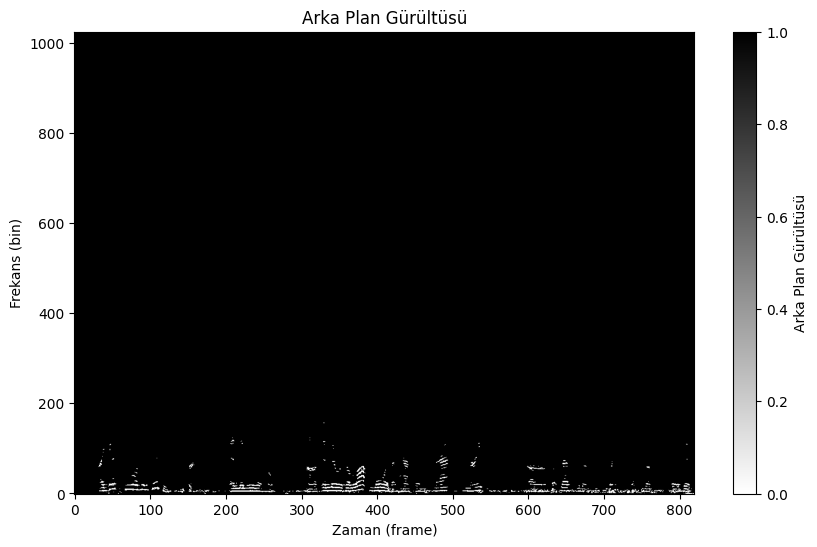

In [107]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

def detect_background_noise(audio_path, threshold=0.1):
    # Ses dosyasını yükle
    audio, sr = librosa.load(audio_path, sr=None)

    # Spektrogram oluştur
    spectrogram = np.abs(librosa.stft(audio))

    # Enerji eşik değerini belirleme
    energy_threshold = np.max(spectrogram) * threshold

    # Arka plan gürültüsünü belirleme
    background_noise = spectrogram < energy_threshold

    return background_noise

# Ses dosyası yolu
audio_path = "Noise.mp3"

# Arka plan gürültüsünü tespit et
background_noise = detect_background_noise(audio_path, threshold=0.1)

# Spektrogramu görselleştir
plt.figure(figsize=(10, 6))
plt.imshow(background_noise, aspect='auto', origin='lower', cmap='binary')
plt.title('Arka Plan Gürültüsü')
plt.xlabel('Zaman (frame)')
plt.ylabel('Frekans (bin)')
plt.colorbar(label='Arka Plan Gürültüsü')
plt.show()


GitHub Örnekler
